In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import ast  # Library for handling literal_eval
from geopy.distance import geodesic


df = pd.read_csv('merged.csv')
# columns = ['maincategory', 'longitude', 'latitude', 'starttime', 'duration', 'subCategoryA', 'attendinggroups', 'closuretype', 'mainstreet']
# df = df[columns]
# df = df[df['maincategory']=='Crash']
df=df.dropna()
# Print the column names to verify
print(df.columns)

quantile_001 = df['duration'].quantile(0.01)
quantile_099 = df['duration'].quantile(0.99)
df = df[(df['duration'] >= quantile_001) & (df['duration'] <= quantile_099)]

Index(['Main_Category', 'Longitude', 'Latitude', 'Day', 'duration',
       'Primary_Vehicle', 'Secondary_Vehicle', 'Is_Major_Incident', 'Advice_A',
       'Advice_B', 'Closure_Type', 'Direction', 'Main_Street',
       'Affected_Lanes', 'Actual_Number_of_Lanes ', 'Suburb', 'Traffic_Volume',
       'SA2_CODE21', 'SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21',
       'AREASQKM21', '0_ZID', '1_Area', '2_ML', '3_TRL', '4_PRL', '5_SRL',
       '6_TrRL', '7_RRL', '8_LsRL', '9_URL', '10_ToRL', '11_EoR', '12_NoN',
       '13_NDEs', '14_NNC2L', '15_NNC3L', '16_NNC4L', '17_AND', '18_NE',
       '19_MCI', '20_CoI', '21 NBS', '22_CA', '23_EA', '24_HA', '25_IA',
       '26_OA', '27_PA', '28_PrA', '29_RA', '30_TA', '31_WbA', '32_EoLU',
       '33_TP', '34_PD0MV', '35_PD1MV', '36_PD2MV', '37_PD3MV', '38_PD≥4MV',
       '39_PUE', '40_AMI', '41_NPTtWbyPT', '42_NPTtWbyTx', '43_NPTtWbyCD',
       '44_NPTtWbyCP', '45_NPTtWbyO', '46_NPWfH', '47_PWCJH', '48_PBCJH',
       '49_ANP_FH', 'RMS', 'Motorwa

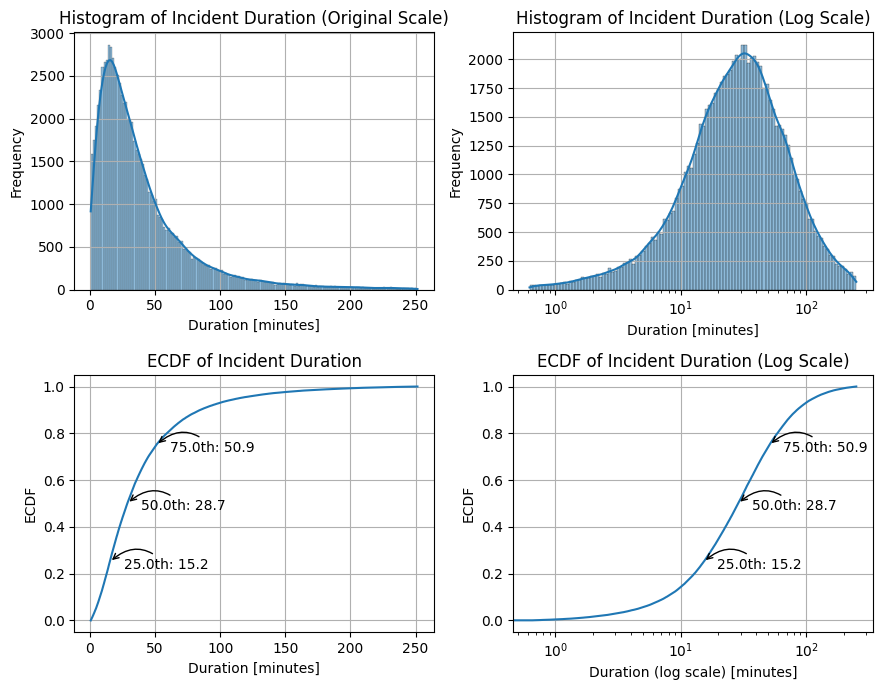

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.gridspec import GridSpec

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
filtered_df = df#df[(df['duration'] >= quantile_001) & (df['duration'] <= quantile_099)]

# Create a 2x2 grid layout for subplots
fig = plt.figure(figsize=(9, 7))
gs = GridSpec(2, 2, figure=fig)

# Plot histograms
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(filtered_df['duration'], kde=True, ax=ax1)
ax1.set_title('Histogram of Incident Duration (Original Scale)')
ax1.set_xlabel('Duration [minutes]')
ax1.set_ylabel('Frequency')
ax1.grid(True)
# ax1.xaxis.set_major_locator(MultipleLocator(100))

# Log scale histogram
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(filtered_df['duration'], kde=True, log_scale=True, ax=ax2)
ax2.set_title('Histogram of Incident Duration (Log Scale)')
ax2.set_xlabel('Duration [minutes]')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# ECDF
# ECDF plot
ax3 = fig.add_subplot(gs[1, 0])
ecdf = ECDF(filtered_df['duration'])
ax3.plot(ecdf.x, ecdf.y, label='ECDF')
ax3.set_title('ECDF of Incident Duration')
ax3.set_xlabel('Duration [minutes]')
ax3.set_ylabel('ECDF')
ax3.grid(True)

# Compute quantiles
quantiles = filtered_df['duration'].quantile([0.25, 0.5, 0.75])

# Annotate quantiles on the ECDF plot
for q in quantiles.index:
    q_value = quantiles[q]
    ecdf_value = ecdf(q_value)
    ax3.annotate(f'{q*100:.1f}th: {np.round(float(q_value),1)}', xy=(q_value, ecdf_value), xytext=(10,-5), 
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"))

# Log scale ECDF
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(ecdf.x, ecdf.y)
ax4.set_xscale('log')
ax4.set_title('ECDF of Incident Duration (Log Scale)')
ax4.set_xlabel('Duration (log scale) [minutes]')
ax4.set_ylabel('ECDF')
ax4.grid(True)

# Annotate quantiles on the log-scale ECDF plot
for q in quantiles.index:
    q_value = quantiles[q]
    ecdf_value = ecdf(q_value)
    ax4.annotate(f'{q*100:.1f}th: {np.round(float(q_value),1)}', xy=(q_value, ecdf_value), xytext=(10,-5), 
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"))

plt.tight_layout()
plt.savefig('incident_duration_plots.pdf')
# plt.show()
